# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1["Name"] = df1["Name"].str.replace(" ", "")
df1["Friend 1"] = df1["Friend 1"].str.replace(" ", "")
df1["Friend 2 "] = df1["Friend 2 "].str.replace(" ", "")
df1.rename(columns = {"Friend 2 ":"Friend 2"}, inplace = True)
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,BettyAllison,female,10,Pandora,MollyMeer,JessicaZebra
1,PeterAlexs,male,10,Limsa,G�ntherCohl,CeasarFeige
2,GregorAllmann,male,11,Pandora,BertEdamer,CeasarFeige
3,TiffanyBecks,female,10,Pandora,AllyInka,SallyBrot
4,SallyBrot,female,10,Limsa,TiffanyBecks,BettyAllison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

In [3]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


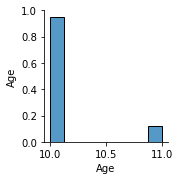

In [4]:
sns.pairplot(df1[["Age", "District", "Gender"]])

In [5]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [6]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}
dic2 = {"female" : "0", "male" : "1"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

for old, new in dic2.items():
    df1['Gender'] = df1['Gender'].str.replace(old, new, regex=False)

df1['District'] = df1['District'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)

In [7]:
df1.head()
df1["Gender"].value_counts()

1    41
0    39
Name: Gender, dtype: int64

## Clustering mall customer segmentation data

In [8]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Gender"]])
kmeans.cluster_centers_

array([[ 2.54545455e+00, -1.11022302e-16],
       [ 4.38888889e+00,  5.55555556e-01],
       [ 0.00000000e+00,  2.63157895e-01],
       [ 1.00000000e+00,  6.47058824e-01],
       [ 2.33333333e+00,  1.00000000e+00]])

In [9]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,4
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,0
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,3
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,3
7,JohnnyCedar,1,10,4,MarvinGeige,LeoJackson,1
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,0
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,3


In [10]:
df1["Clusters"].value_counts()

2    19
1    18
3    17
4    15
0    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

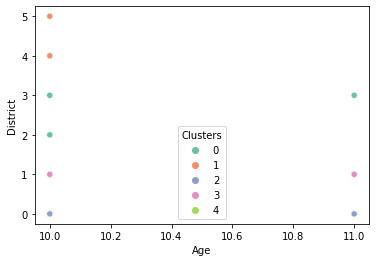

In [11]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [12]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
#from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2
19,YuleHoffnung,0,10,0,ZoeJutter,AmandaFredericks,2
22,ZoeJutter,0,10,0,YuleHoffnung,SallyBrot,2
24,LeoJackson,1,10,0,JohnnyCedar,MaxJovus,2
30,ArnoKrys,1,10,0,VictorSalat,LeoJackson,2
38,MollyMeer,0,11,0,MillyMucks,BettyAllison,2


In [13]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 4)
split_clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2


In [14]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,2
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,2
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,2
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,2
25,HankKalt,1,10,3,BasOffen,ColeMaas,4
26,MaxKaal,1,11,3,AlexanderOdele,BillyNozzle,4
27,TrevorKehl,1,10,2,HankKalt,ColeMaas,4
35,ColeMaas,1,10,3,CarlosVives,BasOffen,4
54,AmoraPeer,0,11,3,GeorgiaPammen,VivianKratz,0


## Visualising diverse groups

In [15]:
group = diverse_groups[0]
#sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [16]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

2    5
4    4
0    3
3    2
Name: Clusters, dtype: int64
14
1    5
2    5
4    4
0    2
Name: Clusters, dtype: int64
16
1    5
2    5
3    5
4    3
Name: Clusters, dtype: int64
18
1    5
3    5
2    4
0    3
Name: Clusters, dtype: int64
17
3    5
4    4
0    3
1    3
Name: Clusters, dtype: int64
15


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [17]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,0
77,JessieSnape,0,10,2,MathildaDamm,StefanieFluss,0
54,AmoraPeer,0,11,3,GeorgiaPammen,VivianKratz,0
67,AmelieReid,0,10,3,TheaRekle,AmoraPeer,0
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,0


## Keeping two customers together: merging rows before clustering
    

In [18]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


#merge_customers1(df2, 1, 2)

In [19]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


#merge_customers2(df2, 1, 200)

In [20]:
df4 = pd.DataFrame()
#for number in range(1, 101):
    #df_temp = df4.append(merge_customers1(df2, number, 100+number))
    #df4 = df_temp
print(df4)
print(len(df4))

Empty DataFrame
Columns: []
Index: []
0


In [21]:
#sns.pairplot(df4[["Age", "Income", "Spending Score"]])

## Clustering students based on network communities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_csv():
    df = pd.read_csv("new_df_friends_classes_small.csv", index_col=[0])
    return df

orig_df = read_csv()

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2
1,31,0,0,0,0,0,0,0,2,120,120
3,120,0,1,0,0,0,1,0,0,228,295
7,287,0,2,0,1,1,2,0,3,120,120
10,310,0,0,0,2,2,3,0,1,287,295
17,272,0,3,1,0,0,1,0,2,175,276
...,...,...,...,...,...,...,...,...,...,...,...
336,258,14,1,0,0,0,1,1,0,264,13
338,309,14,1,0,3,3,3,0,2,121,3
339,62,14,0,1,0,1,1,1,4,101,225
343,153,14,1,1,1,2,0,1,4,225,225


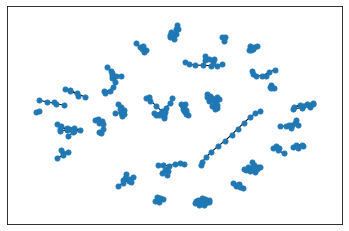

In [17]:
# visualise network of paired students

import networkx as nx

G_symmetric = nx.Graph()

for index, row in new_df_friends.iterrows():
    G_symmetric.add_edge(row["id"], row["friend1"])
    G_symmetric.add_edge(row["id"], row["friend2"])

nx.random_layout(G_symmetric)
nx.draw_networkx(G_symmetric, node_size = 25, with_labels = False)

In [4]:
# extract communities of students and add to list

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

def extract_comm(res_number):
    orig_df = read_csv()
    G_symmetric = nx.Graph()
    for index, row in orig_df.iterrows():
        G_symmetric.add_edge(row["id"], row["friend1"])
        G_symmetric.add_edge(row["id"], row["friend2"])
    c = list(greedy_modularity_communities(G_symmetric, resolution = res_number))
    return c

d = extract_comm(10)

print(len(sorted(d[0])))
print(sorted(d[3]))

# check number of items in list, problem : new nodes are created
x = 0
for e in d:
    for i in e:
        x += 1
print(x)

10
[112, 148, 152, 280, 297, 320, 329, 343, 348]
245


In [6]:
# check percentage of wishes granted

id1 = list(new_df_friends["id"])
id2 = list(new_df_friends["friend1"])
id3 = list(new_df_friends["friend2"])

ideal_groups = [*map(list, zip(id1, id2, id3))]

x = 0

for community in c:
    for group in ideal_groups:    
        if(set(group).issubset(set(community))):
            x += 1

print(x)
print(x / len(ideal_groups) * 100)
        

120
100.0


In [6]:
# turn each community of students into one row in dataframe

def merge_students():
    df = read_csv()
    list_sets = extract_comm(10) # resolution set here
    list_df = []
    for set_students in list_sets:
        mask = df["id"].isin(set_students)
        df_set = df.loc[mask]
        temp_df = pd.DataFrame({"id": [set_students],
                                "number_students": [len(set_students)],
                                "gender_int": [round(df_set["gender_int"].mean(), 1)],
                                "color_int": [round(df_set["color_int"].mean(), 1)],
                                "reading_int": [round(df_set["reading_int"].mean(), 1)],
                                "hobby_int": [round(df_set["hobby_int"].mean(), 1)],
                                "language_int": [round(df_set["language_int"].mean(), 1)],
                                "introverted_int": [round(df_set["introverted_int"].mean(), 1)],
                                "siblings": [round(df_set["siblings"].mean(), 1)],
                                "previous_class_int": [round(df_set["previous_class_int"].mean(), 1)]})
        list_df.append(temp_df)
    merged_communities = pd.concat(list_df, ignore_index=True)
    return merged_communities
        
df_merged_students = merge_students()
df_merged_students.head()


,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int
0,"(134, 237, 338, 29, 181, 56, 249, 349, 61, 63)",10,1.0,2.4,1.8,1.9,1.6,0.3,2.5,10.0
1,"(194, 199, 74, 179, 83, 51, 341, 345, 187, 221)",10,1.0,2.4,1.4,2.6,1.3,0.4,2.3,11.0
2,"(97, 291, 164, 293, 70, 248, 186, 220, 184)",9,0.0,2.0,0.6,2.9,2.9,0.3,2.9,5.0
3,"(320, 329, 297, 112, 148, 343, 280, 348, 152)",9,0.0,2.8,1.0,2.0,1.5,0.7,1.8,8.0
4,"(256, 65, 5, 165, 202, 347, 157, 126)",8,0.0,1.8,1.2,2.0,1.8,0.5,2.5,2.0


## k-means clustering of student groups

Text(0, 0.5, 'Sum of Squared Distances')

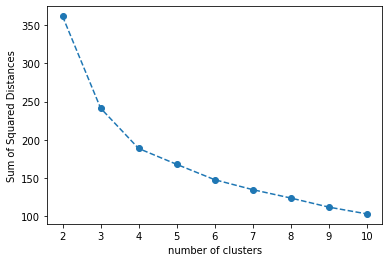

In [7]:
# find ideal number of clusters for k-means clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import sklearn.cluster as cluster


list_inertia = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=42)
    model.fit(df_merged_students[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                  "introverted_int", "siblings", "previous_class_int"]])
    
    list_inertia.append(model.inertia_)

plt.plot(range(2,11), list_inertia, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [15]:
# make sklearn pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def cluster(df):
    scaler = StandardScaler()
    k = 4
    kmeans = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,kmeans)
    pipeline.fit(df[["gender_int", "color_int", "reading_int", "hobby_int", "language_int",
                                 "introverted_int", "siblings", "previous_class_int"]])
    labels = pipeline.predict(df[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                              "introverted_int", "siblings", "previous_class_int"]])
    df["clusters"] = kmeans.labels_
    return df

clustered_df = cluster(df_merged_students)

clustered_df.head()


,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,"(134, 237, 338, 29, 181, 56, 249, 349, 61, 63)",10,1.0,2.4,1.8,1.9,1.6,0.3,2.5,10.0,1
1,"(194, 199, 74, 179, 83, 51, 341, 345, 187, 221)",10,1.0,2.4,1.4,2.6,1.3,0.4,2.3,11.0,1
2,"(97, 291, 164, 293, 70, 248, 186, 220, 184)",9,0.0,2.0,0.6,2.9,2.9,0.3,2.9,5.0,2
3,"(320, 329, 297, 112, 148, 343, 280, 348, 152)",9,0.0,2.8,1.0,2.0,1.5,0.7,1.8,8.0,0
4,"(256, 65, 5, 165, 202, 347, 157, 126)",8,0.0,1.8,1.2,2.0,1.8,0.5,2.5,2.0,0


In [16]:
# make one dataframe for each cluster and add to list

def list_clustered_dataframes(df):
    dataframes_list = []
    for i in df.clusters.unique():
        temporary_df = df[df["clusters"] == i].reset_index(drop=True)
        dataframes_list.append(temporary_df)
        list_sorted = sorted(dataframes_list, key=len, reverse=True)
    return list_sorted

list_df_clustered = list_clustered_dataframes(clustered_df)

list_df_clustered[2]

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,"(331, 307, 37, 90, 107, 78, 159)",7,0.0,1.5,1.8,0.8,1.8,0.5,1.2,13.0,3
1,"(258, 77, 309, 102, 264, 121, 13)",7,0.0,2.2,2.0,1.0,2.5,0.5,1.5,14.0,3
2,"(38, 234, 236, 286, 142, 239)",6,0.0,2.4,2.2,1.2,2.6,1.0,2.0,9.0,3
3,"(217, 151, 41, 91, 44)",5,1.0,1.5,1.0,2.5,3.0,0.5,2.5,12.0,3
4,"(82, 3, 55, 200, 155)",5,0.0,4.0,2.0,1.0,2.5,0.5,4.0,14.0,3
5,"(225, 101, 230, 153, 62)",5,1.0,0.3,0.3,1.0,1.7,0.7,3.3,14.0,3
6,"(321, 255, 22, 1)",4,0.0,2.8,1.5,1.2,3.5,0.8,2.2,6.0,3
7,"(168, 24, 340)",3,0.0,2.0,1.0,1.0,2.0,0.5,2.5,13.0,3
8,"(232, 296)",2,1.0,1.0,1.0,0.0,4.0,1.0,1.0,11.0,3


## Forming final classes

In [17]:
# turn clustered ids into two-dimensional list

ids_clustered = []

for df in list_df_clustered:
    ids_clustered.append(df["id"].tolist())

ids_clustered

[[frozenset({29, 56, 61, 63, 134, 181, 237, 249, 338, 349}),
  frozenset({51, 74, 83, 179, 187, 194, 199, 221, 341, 345}),
  frozenset({12, 14, 182, 240, 245, 290, 314, 344}),
  frozenset({54, 66, 81, 106, 113, 149, 207, 313}),
  frozenset({20, 25, 34, 59, 94, 129, 337}),
  frozenset({73, 122, 140, 238, 278, 312}),
  frozenset({39, 96, 124, 189, 223, 334}),
  frozenset({10, 67, 75, 86, 177}),
  frozenset({27, 47, 125, 209, 327}),
  frozenset({89, 92, 205, 262}),
  frozenset({219, 282, 284, 346}),
  frozenset({58, 218, 306}),
  frozenset({7, 79, 318}),
  frozenset({130, 158, 162}),
  frozenset({127, 298, 336})],
 [frozenset({112, 148, 152, 280, 297, 320, 329, 343, 348}),
  frozenset({5, 65, 126, 157, 165, 202, 256, 347}),
  frozenset({17, 33, 46, 69, 110, 204, 213, 242}),
  frozenset({4, 71, 87, 109, 156, 173, 192}),
  frozenset({132, 143, 183, 212, 246, 247, 333}),
  frozenset({64, 88, 185, 203, 222, 243}),
  frozenset({9, 195, 210, 235, 268, 326}),
  frozenset({0, 49, 135, 229, 241, 2

In [18]:
# create a deep copy of the original set
import copy
ids_clustered_new = copy.deepcopy(ids_clustered)
ids_clustered_new

[[frozenset({29, 56, 61, 63, 134, 181, 237, 249, 338, 349}),
  frozenset({51, 74, 83, 179, 187, 194, 199, 221, 341, 345}),
  frozenset({12, 14, 182, 240, 245, 290, 314, 344}),
  frozenset({54, 66, 81, 106, 113, 149, 207, 313}),
  frozenset({20, 25, 34, 59, 94, 129, 337}),
  frozenset({73, 122, 140, 238, 278, 312}),
  frozenset({39, 96, 124, 189, 223, 334}),
  frozenset({10, 67, 75, 86, 177}),
  frozenset({27, 47, 125, 209, 327}),
  frozenset({89, 92, 205, 262}),
  frozenset({219, 282, 284, 346}),
  frozenset({58, 218, 306}),
  frozenset({7, 79, 318}),
  frozenset({130, 158, 162}),
  frozenset({127, 298, 336})],
 [frozenset({112, 148, 152, 280, 297, 320, 329, 343, 348}),
  frozenset({5, 65, 126, 157, 165, 202, 256, 347}),
  frozenset({17, 33, 46, 69, 110, 204, 213, 242}),
  frozenset({4, 71, 87, 109, 156, 173, 192}),
  frozenset({132, 143, 183, 212, 246, 247, 333}),
  frozenset({64, 88, 185, 203, 222, 243}),
  frozenset({9, 195, 210, 235, 268, 326}),
  frozenset({0, 49, 135, 229, 241, 2

In [21]:
def form_classes(lst_ids_clustered, number_classes):
    ids_classes = []
    length = len(new_df_friends)
    max_size = length // number_classes
    for number in range(number_classes):
        ids_classes.append([]) # append an empty list for every class to overall list
    for every_class in ids_classes:
        size = 0
        while size < max_size:
            for lst in lst_ids_clustered: # go through the clusters within list of IDs/groups of students
                if len(lst[0]) <= max_size - size: # take group of students from cluster if not too big
                    every_class.append(lst[0]) # add group to class
                    size += len(lst[0]) # change remaining class size
                    del lst[0] # delete group of students from cluster
                    if lst == []:
                        lst_ids_clustered.remove(lst) # delete cluster if empty
                else:
                    size = max_size
    return ids_classes, lst_ids_clustered

a, b = form_classes(ids_clustered_new, 5)
print(a)
print(b)


[[frozenset({8, 45, 46, 18, 23}), frozenset({65, 68, 41, 10, 76, 79, 16, 84}), frozenset({96, 3, 99, 38, 71, 109}), frozenset({17, 58, 14, 39})], [frozenset({112, 83, 55, 88, 94}), frozenset({2, 69, 75, 108, 81, 62}), frozenset({32, 66, 37, 77, 82, 22}), frozenset({20}), frozenset({97, 100, 28, 78})], [frozenset({57, 42, 70, 6}), frozenset({101, 80, 52, 26, 93}), frozenset({56, 98, 60, 47}), frozenset({24, 1, 51, 73}), frozenset({12, 89, 59, 92, 95})], [frozenset({72, 105, 19, 116}), frozenset({34, 7, 43, 11, 91}), frozenset({90, 115, 30, 111}), frozenset({0, 113, 50, 61}), frozenset({35, 104, 117, 53, 31}), frozenset({64, 102})], [frozenset({54, 33, 118}), frozenset({21, 67, 36, 85}), frozenset({49, 63}), frozenset({40, 4, 87}), frozenset({48, 107, 29, 119}), frozenset({44}), frozenset({74, 27, 114}), frozenset({25, 5, 110, 86})]]
[[frozenset({9, 106}), frozenset({13, 103})], [frozenset({15})]]


In [11]:
# new set has less elements after running through the function
#ids_clustered_new

In [12]:
# original set still intact
#ids_clustered

In [24]:
# convert frozenset1 to 2d list

def convert_set_to_list1(st):
    new_lst = []
    for i in st:
        temp_lst = []
        for e in i:
            for j in e:
                temp_lst.append(j)
        new_lst.append(temp_lst)
    return new_lst

c = convert_set_to_list1(a)
c

[[8,
  45,
  46,
  18,
  23,
  65,
  68,
  41,
  10,
  76,
  79,
  16,
  84,
  96,
  3,
  99,
  38,
  71,
  109,
  17,
  58,
  14,
  39],
 [112,
  83,
  55,
  88,
  94,
  2,
  69,
  75,
  108,
  81,
  62,
  32,
  66,
  37,
  77,
  82,
  22,
  20,
  97,
  100,
  28,
  78],
 [57,
  42,
  70,
  6,
  101,
  80,
  52,
  26,
  93,
  56,
  98,
  60,
  47,
  24,
  1,
  51,
  73,
  12,
  89,
  59,
  92,
  95],
 [72,
  105,
  19,
  116,
  34,
  7,
  43,
  11,
  91,
  90,
  115,
  30,
  111,
  0,
  113,
  50,
  61,
  35,
  104,
  117,
  53,
  31,
  64,
  102],
 [54,
  33,
  118,
  21,
  67,
  36,
  85,
  49,
  63,
  40,
  4,
  87,
  48,
  107,
  29,
  119,
  44,
  74,
  27,
  114,
  25,
  5,
  110,
  86]]

In [25]:
# convert frozenset2 to 2d list

def convert_set_to_list2(st):
    new_lst = []
    for i in st:
        for e in i:
            temp_lst = []
            for j in e:
                temp_lst.append(j)
            new_lst.append(temp_lst)
    return new_lst

d = convert_set_to_list2(b)
sorted(d, key=len)

#smallest = d.index(min(total_list, key=len))

[[15], [9, 106], [13, 103]]

In [26]:
# adding remaining students
    
def add_rest1(lst_classes, lst_rest):
    merged_list = []
    list1 = sorted(lst_classes, key=len)
    list2 = sorted(lst_rest, key=len, reverse=True)
    for i in range(max((len(list1), len(list2)))):
          while True:
            try:
                list3 = [list1[i], list2[i]]
            except IndexError:
                if len(list1) > len(list2):
                    list2.append([])
                    list3 = [list1[i], list2[i]]
                elif len(list1) < len(list2):
                    list1.append([])
                    list3 = [list1[i], list2[i]]
                continue  
            merged_list.append(list3)
            break
    merged_list_cleaned = []
    for i in merged_list:
        list4 = [] 
        for e in i:            
            for j in e:
                list4.append(j)
        merged_list_cleaned.append(list4)            
    return merged_list_cleaned


final_classes1 = add_rest1(c,d)
final_classes1


[[112,
  83,
  55,
  88,
  94,
  2,
  69,
  75,
  108,
  81,
  62,
  32,
  66,
  37,
  77,
  82,
  22,
  20,
  97,
  100,
  28,
  78,
  9,
  106],
 [57,
  42,
  70,
  6,
  101,
  80,
  52,
  26,
  93,
  56,
  98,
  60,
  47,
  24,
  1,
  51,
  73,
  12,
  89,
  59,
  92,
  95,
  13,
  103],
 [8,
  45,
  46,
  18,
  23,
  65,
  68,
  41,
  10,
  76,
  79,
  16,
  84,
  96,
  3,
  99,
  38,
  71,
  109,
  17,
  58,
  14,
  39,
  15],
 [72,
  105,
  19,
  116,
  34,
  7,
  43,
  11,
  91,
  90,
  115,
  30,
  111,
  0,
  113,
  50,
  61,
  35,
  104,
  117,
  53,
  31,
  64,
  102],
 [54,
  33,
  118,
  21,
  67,
  36,
  85,
  49,
  63,
  40,
  4,
  87,
  48,
  107,
  29,
  119,
  44,
  74,
  27,
  114,
  25,
  5,
  110,
  86]]

In [27]:
def add_rest2(cleaned_lst_classes1, number_classes):
    merged_list = []
    list1 = sorted(cleaned_lst_classes1[:number_classes], key = len)
    list2 = sorted(cleaned_lst_classes1[number_classes:], key = len, reverse = True)
    for i in range(max((len(list1), len(list2)))):
          while True:
            try:
                list3 = [list1[i], list2[i]]
            except IndexError:
                if len(list1) > len(list2):
                    list2.append([])
                    list3 = [list1[i], list2[i]]
                elif len(list1) < len(list2):
                    list1.append([])
                    list3 = [list1[i], list2[i]]
                continue  
            merged_list.append(list3)
            break
    merged_list_cleaned = []
    for i in merged_list:
        list4 = [] 
        for e in i:            
            for j in e:
                list4.append(j)
        merged_list_cleaned.append(list4)            
    return merged_list_cleaned

final_classes2 = add_rest2(final_classes1, 5)
final_classes2

[[112,
  83,
  55,
  88,
  94,
  2,
  69,
  75,
  108,
  81,
  62,
  32,
  66,
  37,
  77,
  82,
  22,
  20,
  97,
  100,
  28,
  78,
  9,
  106],
 [57,
  42,
  70,
  6,
  101,
  80,
  52,
  26,
  93,
  56,
  98,
  60,
  47,
  24,
  1,
  51,
  73,
  12,
  89,
  59,
  92,
  95,
  13,
  103],
 [8,
  45,
  46,
  18,
  23,
  65,
  68,
  41,
  10,
  76,
  79,
  16,
  84,
  96,
  3,
  99,
  38,
  71,
  109,
  17,
  58,
  14,
  39,
  15],
 [72,
  105,
  19,
  116,
  34,
  7,
  43,
  11,
  91,
  90,
  115,
  30,
  111,
  0,
  113,
  50,
  61,
  35,
  104,
  117,
  53,
  31,
  64,
  102],
 [54,
  33,
  118,
  21,
  67,
  36,
  85,
  49,
  63,
  40,
  4,
  87,
  48,
  107,
  29,
  119,
  44,
  74,
  27,
  114,
  25,
  5,
  110,
  86]]

In [28]:
# check number of students in final classes

for e in final_classes2:
    x = 0
    for i in e:
        x += 1
    print(x)

24
24
24
24
24


In [29]:
def make_final_dfs(first_df, list_final_classes):
    list_dfs = []
    for e in list_final_classes:
        new_df = first_df[first_df["id"].isin(e)]
        list_dfs.append(new_df)
    return list_dfs

d = make_final_dfs(new_df_friends, final_classes2)
d[0]

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2
4,28,1,1,0,0,3,1,0,3,28,100
5,78,1,4,0,3,2,0,0,2,28,28
6,97,1,1,0,1,1,0,0,1,100,28
7,100,1,4,0,2,1,3,0,1,28,28
17,22,2,1,1,3,2,4,0,1,77,77
18,32,2,0,1,1,3,4,0,3,37,22
19,37,2,2,1,2,2,1,1,0,37,37
20,66,2,4,1,0,4,1,0,2,82,82
21,77,2,0,1,1,1,3,0,0,32,32
22,82,2,5,1,2,1,0,1,4,22,22


In [27]:
def get_csv_files(list_dfs):
    x = 0
    for i in list_dfs:
        x += 1
        out_filename = "class" + str(x) + ".csv"
        i.to_csv(out_filename, index = True)

get_csv_files(d)

### some tests done by Jonas

In [30]:
# copy class df with class information

lst_final_df = []
x = 0

for df in d:
    x += 1
    class_df = df.copy()
    class_df["class"] = x
    lst_final_df.append(class_df)

final_df = pd.concat(lst_final_df)
final_df.reset_index(drop=True, inplace=True)
final_df

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2,class
0,28,1,1,0,0,3,1,0,3,28,100,1
1,78,1,4,0,3,2,0,0,2,28,28,1
2,97,1,1,0,1,1,0,0,1,100,28,1
3,100,1,4,0,2,1,3,0,1,28,28,1
4,22,2,1,1,3,2,4,0,1,77,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,114,11,5,1,3,1,1,0,0,74,74,5
116,5,12,3,1,2,4,3,1,2,110,86,5
117,25,12,3,1,0,2,1,1,4,86,86,5
118,86,12,0,1,1,3,0,0,4,110,110,5


In [31]:
# loop append cluster dfs to large df for all students
original_df = list_sorted[0].append([list_sorted[1], list_sorted[2], list_sorted[3]])
original_df.reset_index(drop=True, inplace=True)
original_df

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,"(18, 23, 8, 45, 46)",5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
1,"(112, 83, 55, 88, 94)",5,0.0,2.8,1.4,2.4,2.6,0.4,2.0,7.0,0
2,"(97, 100, 28, 78)",4,0.0,2.5,1.5,1.8,1.0,0.0,1.8,1.0,0
3,"(57, 42, 70, 6)",4,0.0,2.2,1.8,1.5,1.0,0.2,1.8,3.0,0
4,"(24, 1, 51, 73)",4,0.0,1.8,1.0,2.0,3.0,0.5,1.0,6.0,0
5,"(72, 105, 19, 116)",4,0.0,3.8,1.8,2.0,1.8,0.2,1.2,8.0,0
6,"(0, 113, 50, 61)",4,0.0,3.2,2.2,2.0,1.8,0.2,0.5,13.0,0
7,"(33, 118, 54)",3,0.0,2.7,2.0,2.3,2.0,0.7,1.3,2.0,0
8,"(40, 4, 87)",3,1.0,2.7,1.7,1.3,1.3,0.0,2.0,7.0,0
9,"(74, 27, 114)",3,1.0,4.7,2.7,1.3,1.7,0.3,1.7,11.0,0


In [32]:
# expand list so every student is a row with cluster
expanded_original_df = original_df.explode("id")
expanded_original_df

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,previous_class_int,clusters
0,18,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,23,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,8,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,45,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
0,46,5,0.0,3.2,2.0,1.8,2.0,0.6,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29,17,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,58,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,14,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3
29,39,4,0.0,4.8,0.0,3.2,1.0,0.5,2.8,9.0,3


In [34]:
# merge expanded_original_df with final dfs
final_merged_df = final_df.merge(expanded_original_df[["id", "clusters"]], how="left", on="id")
final_merged_df

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2,class,clusters
0,28,1,1,0,0,3,1,0,3,28,100,1,0
1,78,1,4,0,3,2,0,0,2,28,28,1,0
2,97,1,1,0,1,1,0,0,1,100,28,1,0
3,100,1,4,0,2,1,3,0,1,28,28,1,0
4,22,2,1,1,3,2,4,0,1,77,77,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,114,11,5,1,3,1,1,0,0,74,74,5,0
116,5,12,3,1,2,4,3,1,2,110,86,5,1
117,25,12,3,1,0,2,1,1,4,86,86,5,1
118,86,12,0,1,1,3,0,0,4,110,110,5,1


In [35]:
temp_df = final_merged_df[final_merged_df["class"]==1]
temp_df.head()

,id,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,siblings,friend1,friend2,class,clusters
0,28,1,1,0,0,3,1,0,3,28,100,1,0
1,78,1,4,0,3,2,0,0,2,28,28,1,0
2,97,1,1,0,1,1,0,0,1,100,28,1,0
3,100,1,4,0,2,1,3,0,1,28,28,1,0
4,22,2,1,1,3,2,4,0,1,77,77,1,2


In [36]:
# check if friend 1 is in class and calculate share of True
# TODO: maybe add a check for friend 2 when friend 1 wasn't found

# Wish score much lower than before - maybe different when we check for friend2?

def measure_wishs_granted(df):
    friend1_found = df["friend1"].isin(df["id"]).value_counts(normalize=True).reset_index()
    friend1_found.columns = ["friend1_found", "share"]
    wish_score1 = round(friend1_found.loc[friend1_found["friend1_found"]==True, "share"].values[0],2)
    
    friend2_found = df["friend2"].isin(df["id"]).value_counts(normalize=True).reset_index()
    friend2_found.columns = ["friend2_found", "share"]
    wish_score2 = round(friend2_found.loc[friend2_found["friend2_found"]==True, "share"].values[0],2)
    
    overall_wish_score = round((wish_score1 + wish_score2) / 2, 2)
    
    return overall_wish_score

In [37]:
# calculate median cluster share
# ideal: 1 / number of clusters (e.g., in case of four clusters the median should be 25%)
# Does this still apply when distribution of students is not 25% per cluster? So, when 50% of students are in cluster 0?

def measure_diversity(df, nb_clusters):
    
    # calculate ideal score
    ideal_score = 1/nb_clusters

    # calculate score for current class
    cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
    cluster_distribution.columns = ["cluster", "share"]
    diversity_score = round(cluster_distribution["share"].median(),2) * nb_clusters # perfect split will turn to 1.0
    
    return diversity_score

In [38]:
# evaluate how well the final class is in terms of diversity and wishs granted

for current_class in pd.unique(final_merged_df["class"]):
    
    temp_df = final_merged_df[final_merged_df["class"]==current_class]
    
    diversity_score = measure_diversity(temp_df, 4)
    
    wish_score = measure_wishs_granted(temp_df)
    
    print(f"Class {current_class} has a diversity score of {diversity_score} and a wish score of {wish_score}.")


Class 1 has a diversity score of 1.0 and a wish score of 1.0.
Class 2 has a diversity score of 1.68 and a wish score of 1.0.
Class 3 has a diversity score of 0.92 and a wish score of 1.0.
Class 4 has a diversity score of 1.32 and a wish score of 1.0.
Class 5 has a diversity score of 1.52 and a wish score of 1.0.


In [39]:
# Class 5 has the worst diversity score. Why? Only three clusters
df = final_merged_df[final_merged_df["class"]==5]
cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
cluster_distribution.columns = ["cluster", "share"]
cluster_distribution

,cluster,share
0,1,0.500
1,0,0.375
2,2,0.125


In [40]:
# Diversity distribution for class 3
df = final_merged_df[final_merged_df["class"]==3]
cluster_distribution = df["clusters"].value_counts(normalize=True).reset_index()
cluster_distribution.columns = ["cluster", "share"]
cluster_distribution

,cluster,share
0,1,0.375000
1,2,0.250000
2,0,0.208333
3,3,0.166667


In [ ]:
def main():
    df_merged_students = merge_students()
    clustered_df = cluster(df_merged_students)
    list_df_clustered = list_clustered_dataframes(clustered_df)